## Applications of SVD
# Final project by Aditya Neelamraju

### About this presentation
This presentation looks at singular value decomposition, and how it can be applied and used

### What is SVD?


The Singular-Value Decomposition, or SVD for short, is a matrix decomposition method for reducing a matrix to its constituent parts in order to make certain subsequent matrix calculations simpler.

before, we continue, let's quickly remember how to compute the SVD in sage. here is an example from lecture

In [4]:
import numpy
import scipy.linalg
import scipy.integrate
A = numpy.array([[2,1,1],[1,-1,3],[0,1,-2]])
U, s, V = scipy.linalg.svd(A)
print(U)
print(s)
print(V)

[[-0.33618447  0.90453943 -0.26227547]
 [-0.80113368 -0.12824982  0.5845826 ]
 [ 0.49514123  0.4066453   0.7677726 ]]
[4.12369962 2.23233078 0.10863116]
[[-0.3573254   0.23282259 -0.90449555]
 [ 0.75294802  0.64481239 -0.13147722]
 [ 0.55261907 -0.72801828 -0.40571116]]


The command A.SVD() returns a triple (U,S,V) so that A=USV^T; U and V are orthogonal matrices; and S is a “diagonal” (but not square) matrix. So, the columns of U are left singular vectors of A, and the columns of V are right singular vectors of A.


### SVD for dimensionality reduction

we often work with datasets, that have a lot of columns(features) which might not be as useful. A very practical and comman application of SVD is taking these big matrices, and decomposing it into smaller matrices which might be more meaningful in our analysis. For example, there might be  a lot of insiginifacnt data entries in our matrix,
To do this we can perform an SVD operation on the original data and select the top k largest singular values in Sigma. These columns can be selected from Sigma and the rows selected from V^T.

here is an example borrowed from https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/

In [5]:
from numpy import diag
from numpy import zeros
from scipy.linalg import svd
# define a matrix
A = numpy.array([
    [1,2,3,4,5,6,7,8,9,10],
    [11,12,13,14,15,16,17,18,19,20],
    [21,22,23,24,25,26,27,28,29,30]])
print(A)
# Singular-value decomposition
U, s, VT = svd(A)
# create m x n Sigma matrix
Sigma = zeros((A.shape[0], A.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:A.shape[0], :A.shape[0]] = diag(s)
# select
n_elements = 2
Sigma = Sigma[:, :n_elements]
VT = VT[:n_elements, :]
# reconstruct
B = U.dot(Sigma.dot(VT))
print(B)
# transform
T = U.dot(Sigma)
print(T)

[[ 1  2  3  4  5  6  7  8  9 10]
 [11 12 13 14 15 16 17 18 19 20]
 [21 22 23 24 25 26 27 28 29 30]]
[[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15. 16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25. 26. 27. 28. 29. 30.]]
[[-18.52157747   6.47697214]
 [-49.81310011   1.91182038]
 [-81.10462276  -2.65333138]]


in this example, we started of with a 3x10 array, and we end up with a 3x2 matrix which might be more helpful while doing machine learning and PCA

### SVD for data Analysis

we have our very familiar tooth, data set. we looked at how we can make pivot tables, in class. but let's use svd on this data set, and see what we can learn from it

In [6]:
tooth=sm.datasets.get_rdataset('ToothGrowth').data

NameError: name 'sm' is not defined

In [8]:
tooth = tooth.drop(columns=['supp'])

In [9]:
tooth

,len,dose
0,4.2,0.5
1,11.5,0.5
2,7.3,0.5
3,5.8,0.5
4,6.4,0.5
5,10.0,0.5
6,11.2,0.5
7,11.2,0.5
8,5.2,0.5
9,7.0,0.5


here, we convert take the values of len and dose from the above dataset, and convert it into numpy arrays.

In [16]:
arr1 = tooth['len'].to_numpy()
arr2 = tooth['dose'].to_numpy()

In [19]:
A2 = matrix([arr1,arr2])
A2.str()
#we cleaned the data, by taking the values of len, dose, and converting it into a matrix

'[ 4.2 11.5  7.3  5.8  6.4 10.0 11.2 11.2  5.2  7.0 16.5 16.5 15.2 17.3 22.5 17.3 13.6 14.5 18.8 15.5 23.6 18.5 33.9 25.5 26.4 32.5 26.7 21.5 23.3 29.5 15.2 21.5 17.6  9.7 14.5 10.0  8.2  9.4 16.5  9.7 19.7 23.3 23.6 26.4 20.0 25.2 25.8 21.2 14.5 27.3 25.5 26.4 22.4 24.5 24.8 30.9 26.4 27.3 29.4 23.0]\n[ 0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  0.5  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0  2.0]'

In [24]:
U, s, V = scipy.linalg.svd(A2)
print(s)
here, the singular values of this mat

[157.43375176   2.88336744]


we were able to convert a data set and find its eigenvalues. this is really useful for Principal componenet analysis, and to see how much each value, of the matrix A2, can be maximized or minimized to make sense of the larger dataset


### SVD for image compression, construction

Another really useful application of SVD, is that it can be used for image reconstruction. here we will take an image, convert it into a matrix, and reconstruct it by computing its svd. this is useful, because while trying to compresss images and save space, its often useful to start from a high resolution image and use svd to get a smaller file with lower resolution

In [29]:
import pylab
A = pylab.mean(pylab.imread('blackcat.png'),2)

pylab is a simple plotting tool. here we take the mean, because we want to scale our image reconstruction to our particular axes on pylab

In [30]:
B = matrix(A) #converting image into matrix

we now have our image as a matrix, that is great, we can now compute its SVD

In [38]:
U, s, V = B.SVD()
n = 32; #here we are setting the number of singular values we are using
C= list(range(n))

In [39]:
for j in range(n):
    C[j]=((U[:,j]*V.transpose()[j,:])*s[j,j])#we are putting together the original image, by multiplying the matrices from the decomposition
D = sum(C) #using values computed in svd to reconstruct image

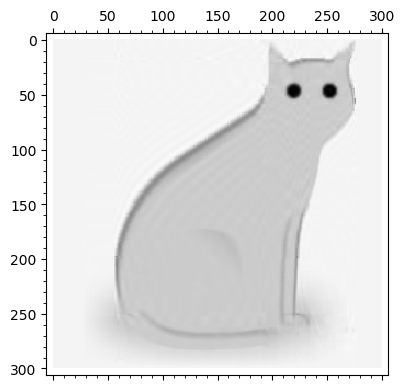

In [40]:
matrix_plot(D)#plotting our graph

we've been able to reconstruct some of the image of the cat!!!
let's explore a little more. what happens when we decrease the number of singular values?

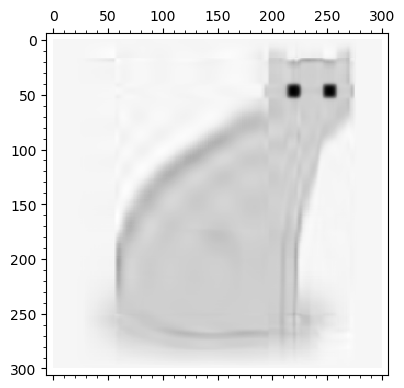

In [42]:
n = 10; #here we are setting the number of singular values we are using
C= list(range(n))
for j in range(n):
    C[j]=((U[:,j]*V.transpose()[j,:])*s[j,j])
D = sum(C)
matrix_plot(D)#plotting our graph

we can see that the image is much blurry, but this means the size of the file is smaller, since it has less components. now let's do the opposite and inccrease the number of singular values we shall use to reconstruct this image. the image i picked is 256x256, so the diagonal matrix can have atmost 256 elements. i set n to 256 here, but that means we are not really doing any compression

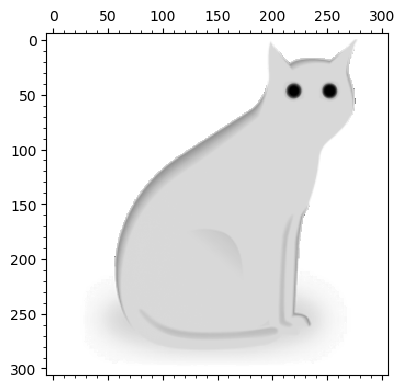

In [45]:
n = 256; #here we are setting the number of singular values we are using
C= list(range(n))
for j in range(n):
    C[j]=((U[:,j]*V.transpose()[j,:])*s[j,j])
D = sum(C)
matrix_plot(D)#plotting our graph

### problem  1a). there is an image in this repository called pirateflag. your job is to convert this image using the method above, and then  reconstructing it. (hint: the resolution of the image is 256x256). problem 1b) make this image as clear as possible

### problem 2. a) take the iris data set. convert the data set into a matrix by only taking into account sepal and petal width and length, b) and find its singular values. c) What can you gain from this?(the last question is open ended, as there are many insights one can gain using PCA)

In [49]:
problem 1 solution

SyntaxError: invalid syntax (<ipython-input-49-2508c95c38ee>, line 1)

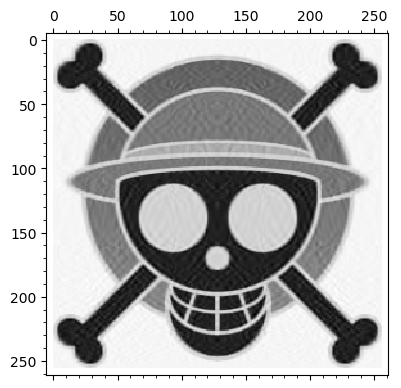

In [62]:
A = pylab.mean(pylab.imread('pirateflag.png'),2)
B = matrix(A) #converting image into matrix
U, s, V = B.SVD()
n = 32; #here we are setting the number of singular values we are using
C= list(range(n))
for j in range(n):
    C[j]=((U[:,j]*V.transpose()[j,:])*s[j,j])#we are putting together the original image, by multiplying the matrices from the decomposition
D = sum(C) #using values computed in svd to reconstruct image
matrix_plot(D)#plotting our graph

In [0]:
1b)

In [64]:
n = 256; #here we are setting the number of singular values we are using
C= list(range(n))
for j in range(n):
    C[j]=((U[:,j]*V.transpose()[j,:])*s[j,j])#we are putting together the original image, by multiplying the matrices from the decomposition
D = sum(C) #using values computed in svd to reconstruct image
matrix_plot(D)#plotting our graph

### problem 2 solution

In [60]:

iris = sm.datasets.get_rdataset('iris').data
iris = iris.drop(columns=['Species'])
arr1 = iris['Sepal.Length'].to_numpy()
arr2 = iris['Sepal.Width'].to_numpy()
arr3 = iris['Petal.Length'].to_numpy()
arr4 = iris['Petal.Width'].to_numpy()
A2 = matrix([arr1,arr2,arr3,arr4])
U, s, V = scipy.linalg.svd(A2)
print(s)

[95.95991387 17.76103366  3.46093093  1.88482631]


/ext/sage/sage-9.0/local/lib/python3.7/site-packages/statsmodels/datasets/utils.py:185: FutureWarning: `item` has been deprecated and will be removed in a future version
  return dataset_meta["Title"].item()


using the above values, we can train a classifier to predict what an average sepal or petal length would look like, if we know the sepal or petal width. the truncatedsvd in sklearn is a good example of a classifier that can do this and is already built

sources:
- professor's lecture notes
- https://blogs.uoregon.edu/math342sp16lipshitz/
- https://see.stanford.edu/materials/lsoeldsee263/16-svd.pdf
- https://personal.utdallas.edu/~herve/Abdi-SVD2007-pretty.pdf
-https://staff.imsa.edu/~fogel/LinAlg/PDF/50%20Application%20of%20the%20SVD.pdf
- https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/